# Soren Stenback - 56957228

## Does Country Of Origin Affect Family History Of Mental Illness?

It is my theory that a person's country of origin may affect their answers in the survey collected as data for this project.

As an example, Bulgaria is a former Soviet-bloc nation and did not have a very good mental health service for many years. People who answered the survey and are from Bulgaria may answer 'no' to a family history of mental illness not because it is true but because they simply do not have the records.

In [1]:
#Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc

---

# Milestone 2

## Task 4 - Load your dataset from a file or URL

In [2]:
#Load raw data into a dataframe
rawDataframe = pd.read_csv('../data/raw/dataRaw.csv')
rawDataframe

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


---

# Milestone 3

## Task 1 - Conduct an Exploratory Data Analysis (EDA) on your dataset

Using pandas, we are going to quickly assess the characteristics and shape of the dataset we are working with.

In [3]:
#Get the row count and the column count
rawDataframe.shape

(1259, 27)

In [4]:
#Get the columns of the raw data
f"Columns: {list(rawDataframe.columns)}"

"Columns: ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']"

In [5]:
#Get the first five rows of the dataframe
rawDataframe.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
#Get the inner description of the data. This will only return age as that is the only value contained as an int
rawDataframe.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


As shown above and in the [data source](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey), there are 27 columns in the raw data: 
1. Timestamp of the individual's survey
2. Age of the individual
3. Gender of the individual
4. Country of origin of the individual
5. US state of origin of the individual if applicable
6. Whether or not the individual is self-employed
7. Whether the individual has a history of mental illness
8. Whether or not the individual has sought treatment for mental health
9. Whether the individual believes their mental health interferes with their work
10. The number of employees at the individual's company
11. Whether the individual works remotely (outside of an office) at least 50% of the time
12. Whether the individual's employer is a primarily tech company
13. Whether the individual's employer provides mental health benefits
14. Whether the individual is aware of their employer's mental health care options
15. Whether the individual's employer has ever discussed a mental health wellness program
16. Whether the individual's employer provides resources on how to seek help for mental health
17. Whether the individual is able to use company resources for mental health anonymously
18. The difficulty of taking mental health leaves at the individual's company
19. Whether the individual thinks discussing mental health with their employer will have negative connotations
20. Whether the individual thinks discussing physical health with their employer will have negative connotations
21. Whether the individual would be willing to discuss mental health with their coworkers
22. Whether the individual would be willing to discuss mental health with their direct supervisor
23. Whether the individual would bring up mental health issues during an interview with a possible employer
24. Whether the individual would bring up physical health issues during an interview with a possible employer
25. Whether the individual believes their employer takes mental health as seriously as physical health
26. Whether the individual has heard of or observed any negative consequences with mental health conditions in their workplace
27.  Any additional comments

We do not need most of these columns for the listed research question, so we will begin to focus on the four rows that are applicable or possibly applicable: age, gender, country of origin, and history of mental illness.

In [7]:
#Get the sum count of unique values for each column
rawDataframe.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

We will now call each of the above applicable columns to see their unique values.

In [8]:
rawDataframe.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [9]:
rawDataframe.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [10]:
rawDataframe.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [11]:
rawDataframe.family_history.unique()

array(['No', 'Yes'], dtype=object)

We can see above that there are a variety of custom values entered into the surveys. We will need to clean up the data, as well as trim down the columns to what we need for our research question.

As the research question above specifically relates to history of illness, we can strip down most of the columns about the workplaces specifically. We will want to keep the data on the individuals themselves, such as gender and age, as well as the vital information on country of origin and family history of mental health. Other columns can be removed from the dataframe and a new dataset created. This will all be done in the analysis pipeline in Task 2.

As the research question pertains specifically to nations such as those of the former Soviet bloc. As such, we want to visualise where in the world the answers in the survey come frome.

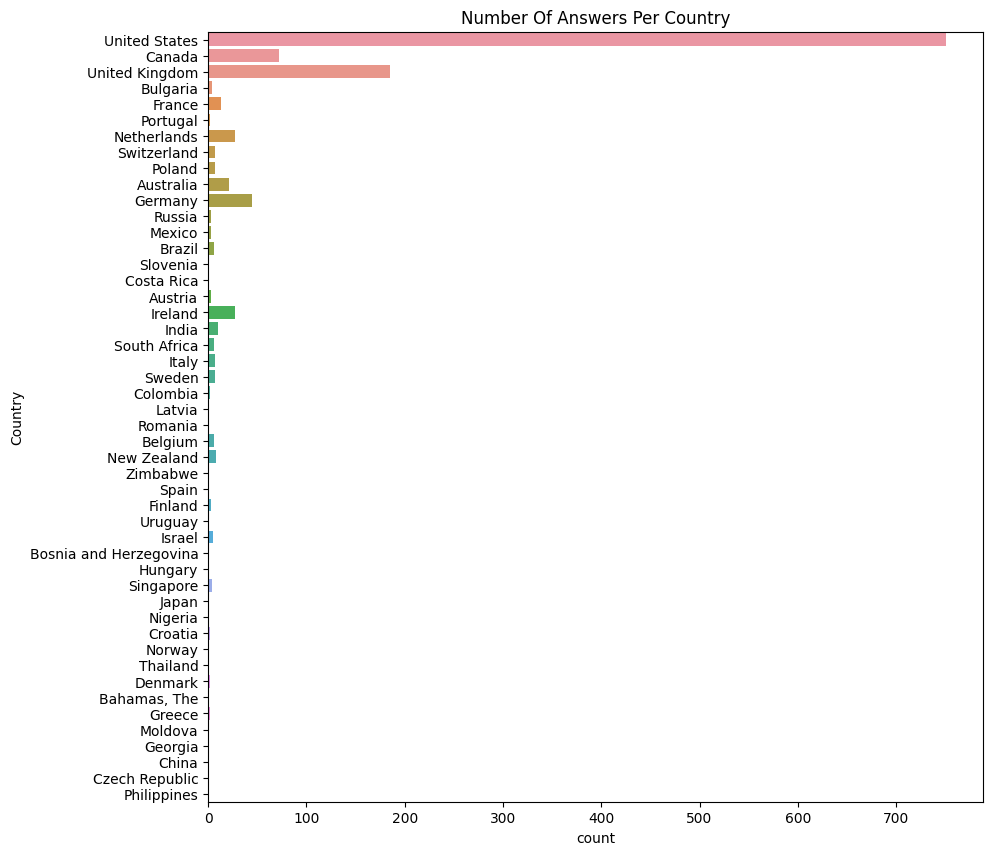

In [12]:
#Set up a seaborn plot
plt.figure(figsize=(10,10))
sns.countplot(data=rawDataframe,y='Country').set(title='Number Of Answers Per Country')
#Display the plot using matplotlib
plt.show()

We can see that, unfortunately, we do not have a huge amount of datapoints for underdeveloped countries or countries that were historically underdeveloped. We will continue to explore the data and will now examine the differences between some former Soviet bloc countries.

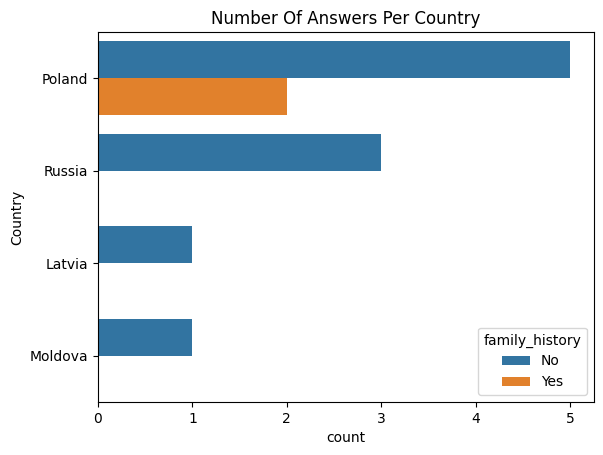

In [13]:
#Get four Soviet bloc countries
polandDf = rawDataframe[rawDataframe['Country'] == 'Poland']
russiaDf = rawDataframe[rawDataframe['Country'] == 'Russia']
latviaDf = rawDataframe[rawDataframe['Country'] == 'Latvia']
moldovaDf = rawDataframe[rawDataframe['Country'] == 'Moldova']
#Merge the dataframes
mergedDfList = [polandDf,russiaDf,latviaDf,moldovaDf]
mergedDf = pd.concat(mergedDfList)
#Set up a seaborn plot
sns.countplot(data=mergedDf,y='Country',hue='family_history').set(title='Number Of Answers Per Country')
#Display the plot using matplotlib
plt.show()

The data we have seems to support the hypothesis of the research question, but the sample sizes are unfortunately not large.

We now have a vague idea of what we are working with and the way the data works.

## Task 2 - Set up an “Analysis Pipeline”

In [14]:
# #Load the original dataset
rawDataframe = pd.read_csv('../data/raw/dataRaw.csv')

# #Drop unneeded columns - We are keeping the four we want to work with
resQuesDf = rawDataframe.copy().drop(columns=['Timestamp', 'state', 'self_employed', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments'],axis=1).dropna(axis=0)

# #Fix up the gender and age columns to account for 'weird' values
#Create a list of each unique gender entry and what they need to be converted to
convertGenderList = [('Female','Female'),('M','Male'),('Male','Male'),('male','Male'),('female','Female'),('m','Male'),('Male-ish','Male'),('maile','Male'),('Trans-female','Female'),('Cis Female','Female'),('F','Female'),('something kinda male?','Male'),('Cis Male','Male'),('Woman','Female'),('f','Female'),('Mal','Male'),('Male (CIS)','Male'),('queer/she/they','Genderqueer'),('non-binary','Non-Binary'),('Femake','Female'),('woman','Female'),('Make','Male'),('Nah','Non-Binary'),('All','Genderqueer'),('Enby','Non-Binary'),('fluid','Genderqueer'),('Genderqueer','Genderqueer'),('Female ','Female'),('Androgyne','Genderqueer'),('Agender','Non-Binary'),('cis-female/femme','Female'),('Guy (-ish) ^_^','Male'),('male leaning androgynous','Genderqueer'),('Male ','Male'),('Man','Male'),('Trans woman','Male'),('msle','Male'),('Neuter','Non-Binary'),('Female (trans)','Female'),('queer','Genderqueer'),('Female (cis)','Female'),('Mail','Male'),('cis male','Male'),('A little about you','Genderqueer'),('Malr','Male'),('p','Genderqueer'),('femail','Female'),('Cis Man','Male'),('ostensibly male, unsure what that really means','Male')]
#Convert each value in the 'Gender' column to one of the default selections; Male, Female, Non-Binary, Genderqueer
for item in convertGenderList:
    resQuesDf['Gender'].replace(*item,inplace=True)
#Get row numbers for rows whose ages are less than 18 and more than 120, as values outside this range are not acceptable
invalidAgeList = list(resQuesDf.loc[(resQuesDf['Age'] < 18) | (resQuesDf['Age'] > 120)].index)
#Set the value of 'Age' in each of the invalid row indexes to be 'NA'
resQuesDf.loc[invalidAgeList,'Age'] = 'NA'

# #Sort the rows based on country first and age second
resQuesDf.sort_values(by=['Country', 'Age'],inplace=True)

# #Rename family_history to Family History to fit the format of the other columns
resQuesDf.rename(columns={'family_history':'Family History'},inplace = True)

# #Fix the incorrect country names
resQuesDf['Country'] = resQuesDf['Country'].replace(['Bahamas, The'],'Bahamas')

# #Write the dataframe to a CSV file in data/processed
resQuesDf.to_csv('../data/processed/sstenbackResearchQuestionData.csv',index=False)

# #Print the head to show the new dataframe
resQuesDf.head()

,Age,Gender,Country,Family History
437,20,Male,Australia,No
280,22,Male,Australia,Yes
1245,22,Male,Australia,Yes
66,23,Female,Australia,Yes
259,25,Male,Australia,Yes


## Task 3 - Method Chaining and writing Python programs

In [16]:
import project_functions2 as p2

#Load the raw dataframe from the base data
rawDataframe = pd.read_csv('../data/raw/dataRaw.csv')
#Call the method chain with the raw data
m3T3Df = p2.load_and_process(rawDataframe)
m3T3Df.head()

,Age,Gender,Country,Family History
437,20,Male,Australia,No
280,22,Male,Australia,Yes
1245,22,Male,Australia,Yes
66,23,Female,Australia,Yes
259,25,Male,Australia,Yes


## Task 4 - Conduct your analysis to help answer your research question(s)

Task 4 is completed in groupAnalysis.ipynb.

---

# Milestone 4

## Task 1 - Process your data for your Tableau Dashboard

My data has already been saved, both the basic research data and my additional columns from Milestone 3, Task 4.

Basic research data is saved in data/processed/sstenbackResearchQuestionData.csv

Additional column data is saved in data/processed/sstenbackM3T4Data.csv